In [68]:
#### MID TERM EXAM 01 - AIDI2000 ####
#### CANDIDO REGIS  - STUDENT ID:101021788 ####

# Import necessary libraries
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [69]:
#### PART A - EXPLORATORY DATA ANALYSIS ####
print("----- PART A - EXPLORATORY DATA ANALYSIS -----")

----- PART A - EXPLORATORY DATA ANALYSIS -----


In [70]:
# Load the dataset
data = pd.read_csv('dataset/influencer_Sponsorship_5k.csv')

In [71]:
# Configure pandas to display float numbers with 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

In [72]:
# Display dataset shape
print("Dataset Shape:\n")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Dataset Shape:

Number of rows: 5000
Number of columns: 8


In [73]:
# Display column names
print("Columns:", data.columns.tolist())

Columns: ['Influencer_ID', 'Followers', 'Engagement_Rate', 'Growth_Rate', 'Niche', 'Video_Quality', 'Avg_Views_per_Post', 'Sponsorship_Status']


In [74]:
# Display data types of each column
print("\nData types:")
print(data.dtypes)


Data types:
Influencer_ID           int64
Followers               int64
Engagement_Rate       float64
Growth_Rate           float64
Niche                  object
Video_Quality          object
Avg_Views_per_Post      int64
Sponsorship_Status      int64
dtype: object


In [75]:
# Display the first 5 rows of the dataset
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   Influencer_ID  Followers  Engagement_Rate  Growth_Rate    Niche  \
0              1    1693743           0.1830       0.0230   Gaming   
1              2    4305572           0.0140       0.0370   Travel   
2              3    4927484           0.0700       0.0190   Beauty   
3              4    2235489           0.0210       0.0020  Fashion   
4              5    1571006           0.1560       0.0060     Tech   

  Video_Quality  Avg_Views_per_Post  Sponsorship_Status  
0            SD              211075                   1  
1            4K              183248                   0  
2            SD               18762                   0  
3            HD              102909                   0  
4            HD              217122                   0  


In [76]:
# Check for missing/null values and suggesting fixes
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing Values', ascending=False)

print("Missing values by feature:")
print(missing_data[missing_data['Missing Values'] > 0])

# If there are missing values, propose fixes
if missing_values.sum() > 0:
    print("\nProposed fixes for missing data:")
    for col in missing_data[missing_data['Missing Values'] > 0].index:
        if data[col].dtype in ['int64', 'float64']:
            print(f"- {col}: Replace with median or mean")
        else:
            print(f"- {col}: Replace with mode (most frequent value)")
else:
    print("\nNo missing values found in the dataset.")

Missing values by feature:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

No missing values found in the dataset.


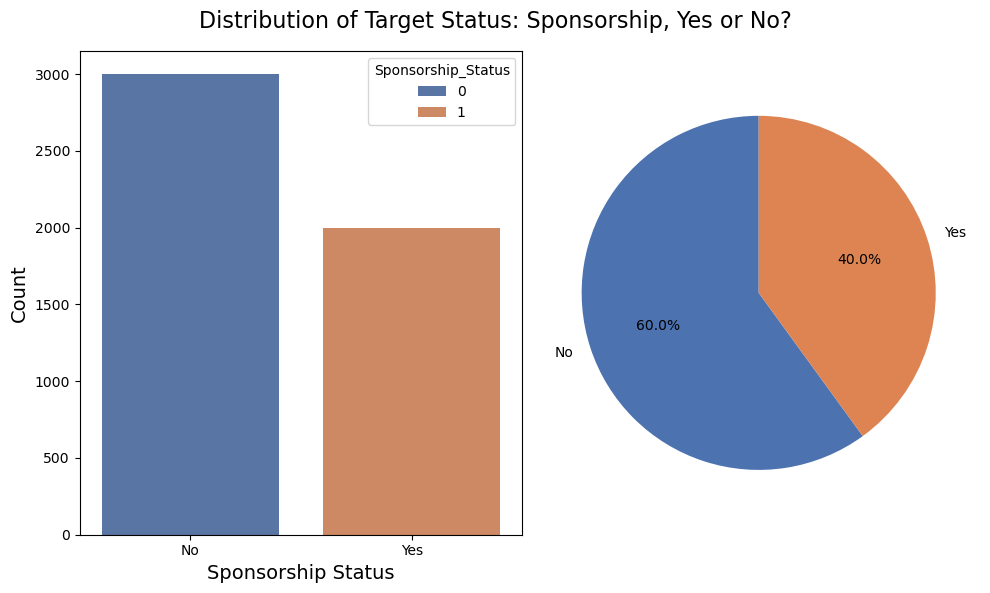

In [77]:
# EDA Visualization 01 - Distribution of Target Status - Sponsorship, Yes or No?
plt.figure(figsize=(10, 6))
plt.suptitle('Distribution of Target Status: Sponsorship, Yes or No?', fontsize=16)
colors = ['#4c72b0', '#dd8452']

plt.subplot(1, 2, 1)
sns.countplot(x='Sponsorship_Status', data=data, palette=colors, hue='Sponsorship_Status')
plt.xlabel('Sponsorship Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'])

plt.subplot(1, 2, 2)
sponsorship_counts = data['Sponsorship_Status'].value_counts()
labels = ['No', 'Yes']
plt.pie(sponsorship_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.tight_layout()
plt.show()

In [78]:
# Convert categorical variables to numeric for correlation analysis
data_encoded = data.copy()
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(data[col])

# Calculate correlation with target variable
correlation_with_target = data_encoded.corr()['Sponsorship_Status'].sort_values(ascending=False)
print("\nCorrelation of features with Sponsorship_Status:")
print(correlation_with_target)


Correlation of features with Sponsorship_Status:
Sponsorship_Status    1.0000
Video_Quality         0.0115
Engagement_Rate       0.0106
Niche                 0.0042
Growth_Rate           0.0033
Followers            -0.0014
Influencer_ID        -0.0053
Avg_Views_per_Post   -0.0088
Name: Sponsorship_Status, dtype: float64


In [79]:
# Identify the most correlated feature (excluding the target itself)
most_correlated_feature = correlation_with_target.drop('Sponsorship_Status').idxmax()
correlation_value = correlation_with_target[most_correlated_feature]
print(f"\nThe feature most correlated with Sponsorship_Status is: {most_correlated_feature} (correlation: {correlation_value:.4f})")


The feature most correlated with Sponsorship_Status is: Video_Quality (correlation: 0.0115)


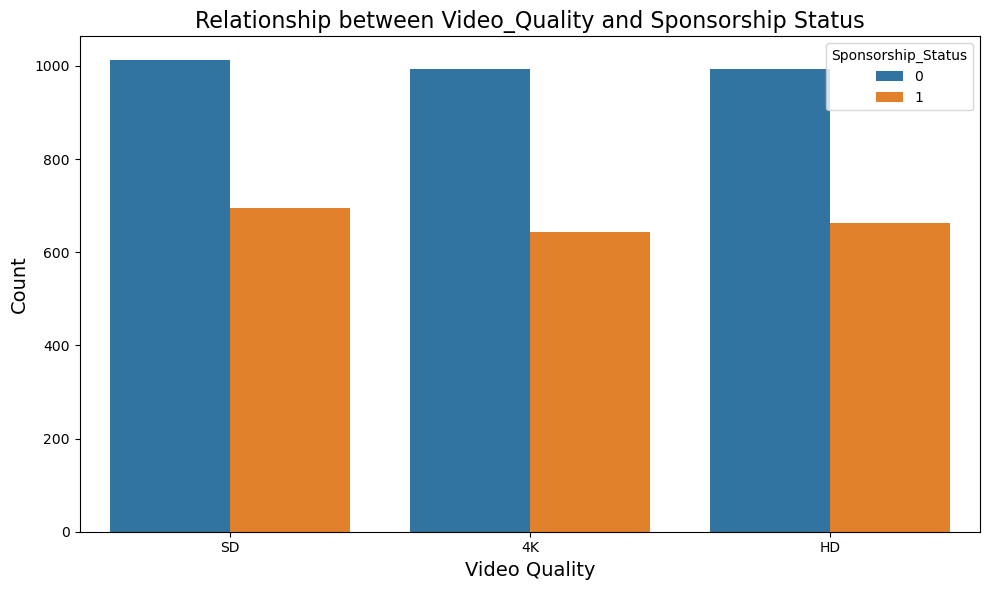

In [80]:
# Visualize the relationship between the most correlated feature and the target
plt.figure(figsize=(10, 6))
sns.countplot(x=most_correlated_feature, hue='Sponsorship_Status', data=data)
plt.title(f'Relationship between {most_correlated_feature} and Sponsorship Status', fontsize=16)
plt.xlabel('Video Quality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


In [81]:
print("\nAnalysis of the Chosen Correlated Feature:")
print(f"Based on the COrrelation Matrix, the feature '{most_correlated_feature}' has a positive correlation ({correlation_value:.4f}) with Sponsorship_Status.")
print(f"This means that as '{most_correlated_feature}' increases, the likelihood of an influencer receiving sponsorship also increases.")


Analysis of the Chosen Correlated Feature:
Based on the COrrelation Matrix, the feature 'Video_Quality' has a positive correlation (0.0115) with Sponsorship_Status.
This means that as 'Video_Quality' increases, the likelihood of an influencer receiving sponsorship also increases.


In [82]:
#### PART B - ML BASELINE MODEL ####
print("----- PART B - ML BASELINE MODEL -----")

----- PART B - ML BASELINE MODEL -----


In [83]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_cols}")

Categorical features: ['Niche', 'Video_Quality']


In [84]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Sponsorship_Status')  # Remove target variable
numerical_cols.remove('Influencer_ID')  # Remove ID column as it's not a feature
print(f"Numerical features: {numerical_cols}")

Numerical features: ['Followers', 'Engagement_Rate', 'Growth_Rate', 'Avg_Views_per_Post']


In [85]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [86]:
# Prepare features and target
X = data.drop(['Sponsorship_Status', 'Influencer_ID'], axis=1)
y = data['Sponsorship_Status']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split complete:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Data split complete:
Training set: 4000 samples
Testing set: 1000 samples


In [88]:
# Initialize results dictionary
results = {}

In [89]:
# Function to evaluate and display model results
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print prediction distribution
    unique, counts = np.unique(y_pred, return_counts=True)
    pred_distribution = dict(zip(unique, counts))
    print(f"Prediction distribution: {pred_distribution}")
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Handle potential division by zero in metrics
    if len(np.unique(y_pred)) == 1:
        print(f"WARNING: Model is predicting only one class: {y_pred[0]}")
        # Calculate metrics manually to avoid division by zero
        if y_pred[0] == 1:
            # All predictions are positive
            tp = np.sum((y_test == 1) & (y_pred == 1))
            fp = np.sum((y_test == 0) & (y_pred == 1))
            fn = np.sum((y_test == 1) & (y_pred == 0))
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        else:
            # All predictions are negative
            precision = 0  # No positive predictions
            recall = 0     # No true positives
        f1 = 0  # F1 is 0 when either precision or recall is 0
    else:
        # Use scikit-learn's functions when we have predictions for both classes
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Print metrics
    print(f"{model_name} Performance:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    print(f"\nTrue Positives (TP): {cm[1][1]} - Correctly predicted sponsored influencers")
    print(f"True Negatives (TN): {cm[0][0]} - Correctly predicted non-sponsored influencers")
    print(f"False Positives (FP): {cm[0][1]} - Non-sponsored influencers incorrectly predicted as sponsored")
    print(f"False Negatives (FN): {cm[1][0]} - Sponsored influencers incorrectly predicted as non-sponsored")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Sponsored', 'Sponsored'],
                yticklabels=['Not Sponsored', 'Sponsored'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
# Define models to evaluate
models = {
    'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))]),
    'Support Vector Machine': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True))]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
}

In [90]:
print("1. LOGISTIC REGRESSION MODEL")

# Logistic Regression
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,        # Increase max iterations
        C=0.1,               # Regularization strength (smaller values = stronger regularization)
        class_weight='balanced',  # Handle class imbalance
        solver='liblinear'    # Better for smaller datasets
    ))
])

1. LOGISTIC REGRESSION MODEL


In [91]:
print("Training Logistic Regression model...")
log_reg.fit(X_train, y_train)

Training Logistic Regression model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Followers',
                                                   'Engagement_Rate',
                                                   'Growth_Rate',
                                                   'Avg_Views_per_Post']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Niche',
                                                   'Video_Quality'])])),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])

Prediction distribution: {0: 472, 1: 528}
Logistic Regression Performance:
  Accuracy:  0.4760
  Precision: 0.3826
  Recall:    0.5050
  F1 Score:  0.4353

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.46      0.51       600
           1       0.38      0.51      0.44       400

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.47      1000
weighted avg       0.50      0.48      0.48      1000


Confusion Matrix:
[[274 326]
 [198 202]]

True Positives (TP): 202 - Correctly predicted sponsored influencers
True Negatives (TN): 274 - Correctly predicted non-sponsored influencers
False Positives (FP): 326 - Non-sponsored influencers incorrectly predicted as sponsored
False Negatives (FN): 198 - Sponsored influencers incorrectly predicted as non-sponsored


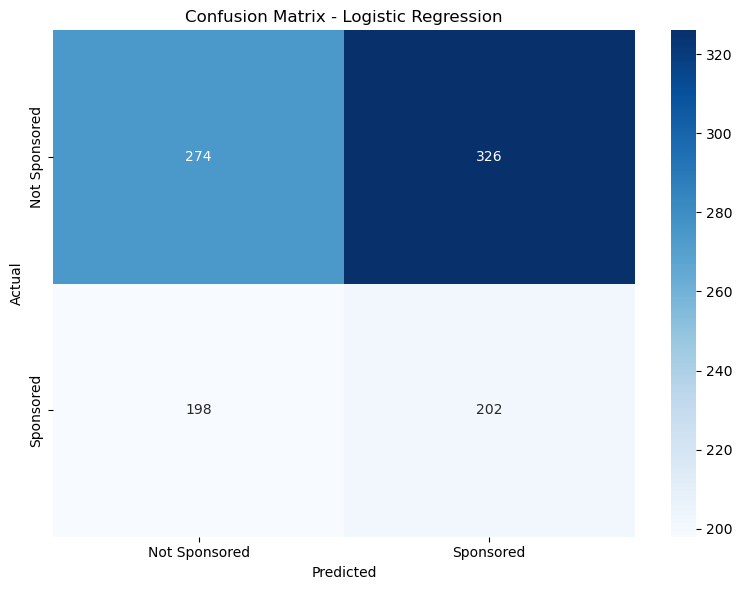

In [92]:
# Evaluate Logistic Regression
results['Logistic Regression'] = evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

In [93]:
print("2. RANDOM FOREST MODEL")

# Random Forest
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=200,     # More trees
        max_depth=10,         # Control tree depth to prevent overfitting
        min_samples_split=5,  # Minimum samples required to split a node
        min_samples_leaf=2,   # Minimum samples required at a leaf node
        class_weight='balanced',  # Handle class imbalance
        bootstrap=True        # Use bootstrap samples
    ))
])

2. RANDOM FOREST MODEL


In [94]:
print("Training Random Forest model...")
rf.fit(X_train, y_train)

Training Random Forest model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Followers',
                                                   'Engagement_Rate',
                                                   'Growth_Rate',
                                                   'Avg_Views_per_Post']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Niche',
                                                   'Video_Quality'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=200, random_state=42))])

Prediction distribution: {0: 614, 1: 386}
Random Forest Performance:
  Accuracy:  0.5040
  Precision: 0.3756
  Recall:    0.3625
  F1 Score:  0.3690

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       600
           1       0.38      0.36      0.37       400

    accuracy                           0.50      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.50      0.50      0.50      1000


Confusion Matrix:
[[359 241]
 [255 145]]

True Positives (TP): 145 - Correctly predicted sponsored influencers
True Negatives (TN): 359 - Correctly predicted non-sponsored influencers
False Positives (FP): 241 - Non-sponsored influencers incorrectly predicted as sponsored
False Negatives (FN): 255 - Sponsored influencers incorrectly predicted as non-sponsored


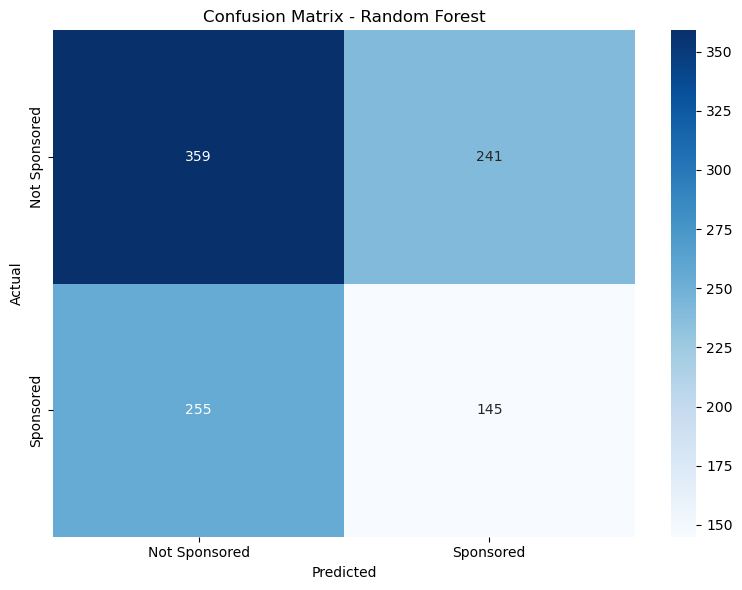

In [95]:
# Evaluate Random Forest
results['Random Forest'] = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")

In [96]:
print("3. SUPPORT VECTOR MACHINE MODEL")

# SVM
svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        random_state=42,
        probability=True,
        C=1.0,               # Regularization parameter
        kernel='linear',      # Linear kernel often works well for high-dimensional data
        class_weight='balanced',  # Handle class imbalance
        gamma='scale'        # Kernel coefficient
    ))
])

3. SUPPORT VECTOR MACHINE MODEL


In [97]:
print("Training SVM model...")
svm.fit(X_train, y_train)

Training SVM model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Followers',
                                                   'Engagement_Rate',
                                                   'Growth_Rate',
                                                   'Avg_Views_per_Post']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Niche',
                                                   'Video_Quality'])])),
                ('classifier',
                 SVC(class_weight='balanced', kernel='linear', probability=True,
                     random_state=42))])

Prediction distribution: {0: 486, 1: 514}
Support Vector Machine Performance:
  Accuracy:  0.4880
  Precision: 0.3911
  Recall:    0.5025
  F1 Score:  0.4398

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.48      0.53       600
           1       0.39      0.50      0.44       400

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.51      0.49      0.49      1000


Confusion Matrix:
[[287 313]
 [199 201]]

True Positives (TP): 201 - Correctly predicted sponsored influencers
True Negatives (TN): 287 - Correctly predicted non-sponsored influencers
False Positives (FP): 313 - Non-sponsored influencers incorrectly predicted as sponsored
False Negatives (FN): 199 - Sponsored influencers incorrectly predicted as non-sponsored


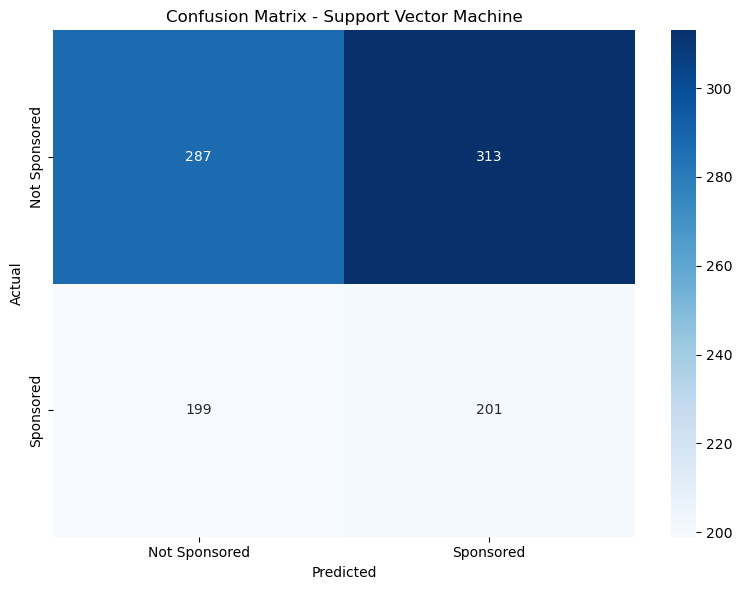

In [98]:
# Evaluate SVM
results['Support Vector Machine'] = evaluate_model(svm, X_train, X_test, y_train, y_test, "Support Vector Machine")

MODEL COMPARISON


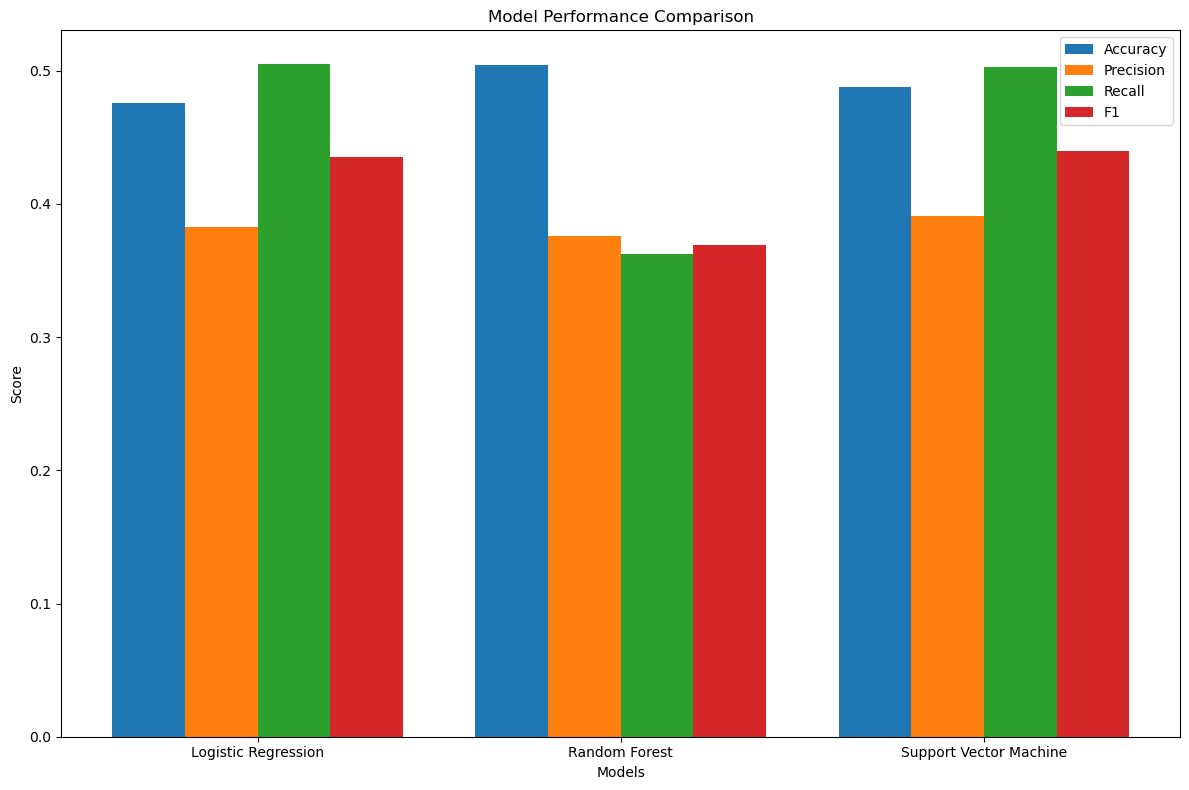

In [99]:
print("MODEL COMPARISON")

metrics = ['accuracy', 'precision', 'recall', 'f1']
model_names = list(results.keys())

plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(model_names))

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in model_names]
    plt.bar(index + i * bar_width, values, bar_width, label=metric.capitalize())

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names)
plt.legend()
plt.tight_layout()
plt.show()

In [100]:
# Print comparison table
print("\nModel Performance Summary:")
print("-"*70)
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-"*70)
for model in model_names:
    print(f"{model:<25} {results[model]['accuracy']:<10.4f} {results[model]['precision']:<10.4f} {results[model]['recall']:<10.4f} {results[model]['f1']:<10.4f}")
print("-"*70)


Model Performance Summary:
----------------------------------------------------------------------
Model                     Accuracy   Precision  Recall     F1 Score  
----------------------------------------------------------------------
Logistic Regression       0.4760     0.3826     0.5050     0.4353    
Random Forest             0.5040     0.3756     0.3625     0.3690    
Support Vector Machine    0.4880     0.3911     0.5025     0.4398    
----------------------------------------------------------------------


In [101]:
# Select the best model based on F1 score
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model = results[best_model_name]['model']
print(f"\nSelected best model: {best_model_name} (highest F1 score: {results[best_model_name]['f1']:.4f})")


Selected best model: Support Vector Machine (highest F1 score: 0.4398)


In [102]:
print("A confusion matrix is a table used to evaluate the performance of a classification model. ")
print("It shows the number of true positives (TP), true negatives (TN), false positives (FP), and ")
print("false negatives (FN). This helps you understand where the model is making correct vs. incorrect")
print("predictions, especially for binary or multiclass problems.")
print("The confusion matrix for the chosen best model (Random Forest) was displayed before.")

A confusion matrix is a table used to evaluate the performance of a classification model. 
It shows the number of true positives (TP), true negatives (TN), false positives (FP), and 
false negatives (FN). This helps you understand where the model is making correct vs. incorrect
predictions, especially for binary or multiclass problems.
The confusion matrix for the chosen best model (Random Forest) was displayed before.


In [103]:
print("4. DEEP LEARNING MODEL (MLP)")

4. DEEP LEARNING MODEL (MLP)


In [104]:
# Preprocess the data for Keras
preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [105]:
# Get the number of features after preprocessing
n_features = X_train_preprocessed.shape[1]

In [106]:
# PBuild MLP with Keras
print("\nBuilding MLP model with Keras...")
mlp = Sequential([
    keras.Input(shape=(n_features,)), # Input layer
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer
])


Building MLP model with Keras...


In [107]:
# Compile the model
mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [108]:
# Print model summary
mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
# Train model with validation split
print("\nTraining MLP model...")
history = mlp.fit(
    X_train_preprocessed, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Training MLP model...
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5060 - loss: 0.7070 - val_accuracy: 0.6150 - val_loss: 0.6710
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.5829 - loss: 0.6819 - val_accuracy: 0.6150 - val_loss: 0.6696
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.5996 - loss: 0.6731 - val_accuracy: 0.6150 - val_loss: 0.6700
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.5956 - loss: 0.6716 - val_accuracy: 0.6150 - val_loss: 0.6695
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.6084 - loss: 0.6687 - val_accuracy: 0.6137 - val_loss: 0.6705
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.5947 - loss: 0.6730 - val_accuracy: 0.6150 - val_loss: 0.6701
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5800 - loss: 0.6742 - val_accuracy: 0.6137 - val_loss: 0.6706
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accur

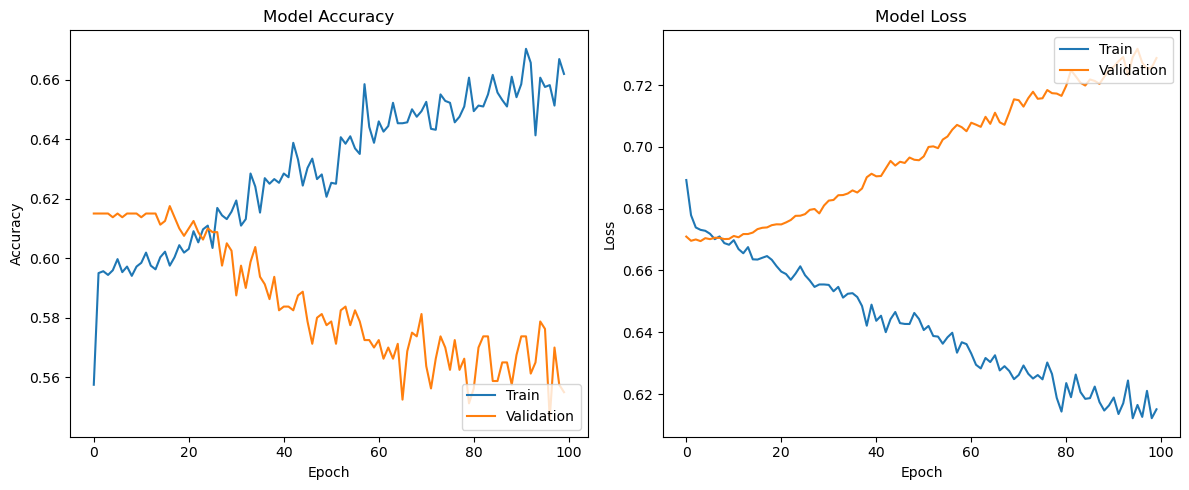

In [110]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [111]:
# Evaluate the model on test data
y_pred_proba = mlp.predict(X_test_preprocessed)
y_pred = (y_pred_proba > 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


In [112]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

In [113]:
# Print metrics
print("\nMLP Model Performance:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1 Score:  {f1:.4f}")


MLP Model Performance:
  Accuracy:  0.5550
  Precision: 0.3810
  Recall:    0.1800
  F1 Score:  0.2445


In [114]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.81      0.68       600
           1       0.38      0.18      0.24       400

    accuracy                           0.56      1000
   macro avg       0.49      0.49      0.46      1000
weighted avg       0.51      0.56      0.51      1000



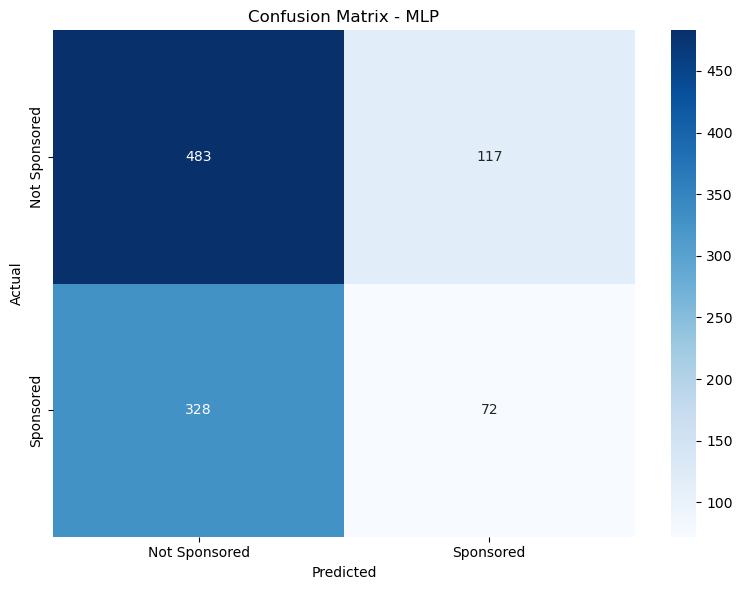

In [115]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sponsored', 'Sponsored'],
            yticklabels=['Not Sponsored', 'Sponsored'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.tight_layout()
plt.show()

In [116]:
# Compare MLP with best baseline model
print("\nComparing MLP with best baseline model...")
print("\nModel Comparison:")
print("-"*70)
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-"*70)
print(f"{best_model_name:<25} {results[best_model_name]['accuracy']:<10.4f} {results[best_model_name]['precision']:<10.4f} {results[best_model_name]['recall']:<10.4f} {results[best_model_name]['f1']:<10.4f}")
print(f"{'MLP':<25} {accuracy:<10.4f} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f}")
print("-"*70)


Comparing MLP with best baseline model...

Model Comparison:
----------------------------------------------------------------------
Model                     Accuracy   Precision  Recall     F1 Score  
----------------------------------------------------------------------
Support Vector Machine    0.4880     0.3911     0.5025     0.4398    
MLP                       0.5550     0.3810     0.1800     0.2445    
----------------------------------------------------------------------


In [117]:
# Explanation
print("\nDid deep learning improve results?")
if f1 > results[best_model_name]['f1']:
    print("Yes, deep learning improved results. The MLP model was able to capture more complex patterns in the data")
    print("that traditional models missed, resulting in better predictive performance.")
else:
    print("No, deep learning did not improve results. This suggests that the relationship between features and target")
    print("is either not complex enough to benefit from deep learning or the features themselves lack predictive power.")



Did deep learning improve results?
No, deep learning did not improve results. This suggests that the relationship between features and target
is either not complex enough to benefit from deep learning or the features themselves lack predictive power.


In [118]:
print("5. IMPROVED MLP WITH REGULARIZATION")

5. IMPROVED MLP WITH REGULARIZATION


In [119]:
# Build improved MLP with regularization
print("\nBuilding improved MLP model with regularization...")
regularized_model = Sequential([
    keras.Input(shape=(n_features,)), # Input layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Additional dropout
    Dense(1, activation='sigmoid')     # Output layer
])


Building improved MLP model with regularization...


In [120]:
# Compile the model
regularized_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [121]:
# Print model summary
regularized_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
# Train model with validation split
print("\nTraining improved MLP model...")
reg_history = regularized_model.fit(
    X_train_preprocessed, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Training improved MLP model...
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5609 - loss: 0.7531 - val_accuracy: 0.6150 - val_loss: 0.7288
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5939 - loss: 0.7286 - val_accuracy: 0.6150 - val_loss: 0.7210
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.5993 - loss: 0.7230 - val_accuracy: 0.6150 - val_loss: 0.7158
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.5970 - loss: 0.7175 - val_accuracy: 0.6150 - val_loss: 0.7111
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.5901 - loss: 0.7155 - val_accuracy: 0.6150 - val_loss: 0.7060
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.5937 - loss: 0.7048 - val_accuracy: 0.6150 - val_loss: 0.7032
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.5942 - loss: 0.7078 - val_accuracy: 0.6150 - val_loss: 0.6986
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/ste

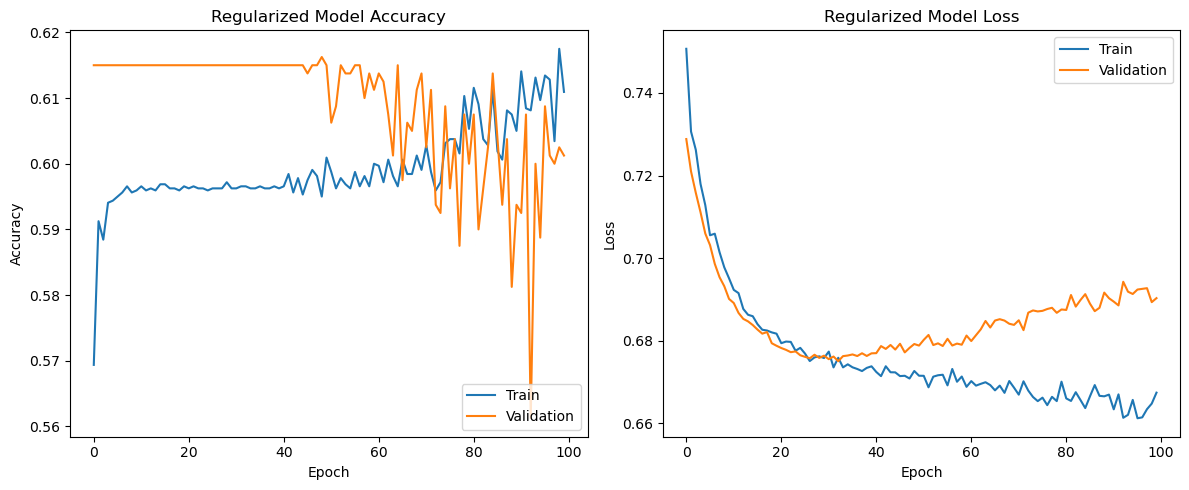

In [123]:
# Plot accuracy and loss curves for regularized model
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])
plt.title('Regularized Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularized Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [124]:
# Evaluate the regularized model on test data
y_reg_pred_proba = regularized_model.predict(X_test_preprocessed)
y_reg_pred = (y_reg_pred_proba > 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


In [125]:
# Calculate metrics
reg_accuracy = accuracy_score(y_test, y_reg_pred)
reg_precision = precision_score(y_test, y_reg_pred, zero_division=0)
reg_recall = recall_score(y_test, y_reg_pred, zero_division=0)
reg_f1 = f1_score(y_test, y_reg_pred, zero_division=0)

In [126]:
# Print metrics
print("\nRegularized MLP Model Performance:")
print(f"  Accuracy:  {reg_accuracy:.4f}")
print(f"  Precision: {reg_precision:.4f}")
print(f"  Recall:    {reg_recall:.4f}")
print(f"  F1 Score:  {reg_f1:.4f}")


Regularized MLP Model Performance:
  Accuracy:  0.5760
  Precision: 0.3537
  Recall:    0.0725
  F1 Score:  0.1203


In [127]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_reg_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       600
           1       0.35      0.07      0.12       400

    accuracy                           0.58      1000
   macro avg       0.47      0.49      0.42      1000
weighted avg       0.50      0.58      0.48      1000



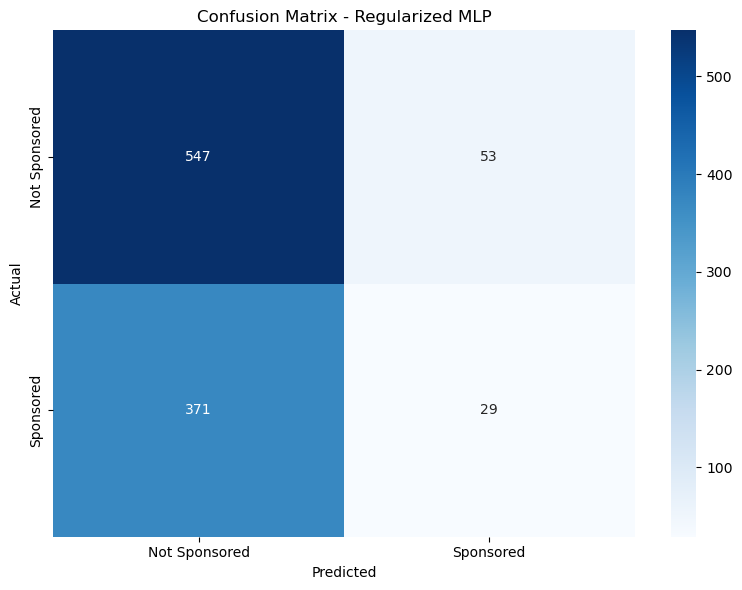

In [128]:
# Plot confusion matrix
cm_reg = confusion_matrix(y_test, y_reg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sponsored', 'Sponsored'],
            yticklabels=['Not Sponsored', 'Sponsored'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Regularized MLP')
plt.tight_layout()
plt.show()

In [129]:
# Compare regularized vs original MLP
print("\nComparing regularized MLP with original MLP...")
print("\nMLP Model Comparison:")
print("-"*70)
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-"*70)
print(f"{'Original MLP':<25} {accuracy:<10.4f} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f}")
print(f"{'Regularized MLP':<25} {reg_accuracy:<10.4f} {reg_precision:<10.4f} {reg_recall:<10.4f} {reg_f1:<10.4f}")
print("-"*70)


Comparing regularized MLP with original MLP...

MLP Model Comparison:
----------------------------------------------------------------------
Model                     Accuracy   Precision  Recall     F1 Score  
----------------------------------------------------------------------
Original MLP              0.5550     0.3810     0.1800     0.2445    
Regularized MLP           0.5760     0.3537     0.0725     0.1203    
----------------------------------------------------------------------


In [130]:
# Calculate training vs validation gap for both models
orig_train_acc = history.history['accuracy'][-1]
orig_val_acc = history.history['val_accuracy'][-1]
orig_gap = orig_train_acc - orig_val_acc

reg_train_acc = reg_history.history['accuracy'][-1]
reg_val_acc = reg_history.history['val_accuracy'][-1]
reg_gap = reg_train_acc - reg_val_acc

print("\nOverfitting Analysis:")
print(f"Original MLP - Train-Validation Accuracy Gap: {orig_gap:.4f}")
print(f"Regularized MLP - Train-Validation Accuracy Gap: {reg_gap:.4f}")


Overfitting Analysis:
Original MLP - Train-Validation Accuracy Gap: 0.1069
Regularized MLP - Train-Validation Accuracy Gap: 0.0097


In [131]:
# Explanation
print("\nDid regularization reduce overfitting?")
if reg_gap < orig_gap:
    print("Yes, regularization reduced overfitting. The gap between training and validation accuracy is smaller")
    print("in the regularized model, indicating better generalization to unseen data.")
else:
    print("No, regularization did not reduce overfitting. The gap between training and validation accuracy")
    print("remains similar or larger, suggesting regularization didn't improve generalization.")


Did regularization reduce overfitting?
Yes, regularization reduced overfitting. The gap between training and validation accuracy is smaller
in the regularized model, indicating better generalization to unseen data.


In [132]:
print('Q1. What kind of image to use in this context for a CNN?')
print('For influencer sponsorship prediction, I would use screenshots of the influencers') 
print('social media posts that include both the visual content and any text overlays, as')
print('these would reveal product placements, branded content, specific visual aesthetics,')
print('and disclosure language that are strong indicators of sponsored content.')

Q1. What kind of image to use in this context for a CNN?
For influencer sponsorship prediction, I would use screenshots of the influencers
social media posts that include both the visual content and any text overlays, as
these would reveal product placements, branded content, specific visual aesthetics,
and disclosure language that are strong indicators of sponsored content.


In [133]:
print('CNN Architecture:')
def build_cnn_model(input_shape=(224, 224, 3)):
    model = Sequential([
        # First Convolutional Block
        tf.keras.Input(input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Flatten and Dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        
        # Output layer
        Dense(1, activation='sigmoid')  # Binary classification: sponsored or not
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

CNN Architecture:


In [134]:
print('Q2. What Would CNN Detect?')
print('Q3. What kind of visual patterns would the Conv2D filters learn?')
print('The CNN would detect visual patterns such as product placements, branded logos, and specific aesthetics')
print('in the influencers\' posts. The Conv2D filters would learn to recognize these patterns by')
print('identifying edges, textures, and shapes that are characteristic of sponsored content.')

Q2. What Would CNN Detect?
Q3. What kind of visual patterns would the Conv2D filters learn?
The CNN would detect visual patterns such as product placements, branded logos, and specific aesthetics
in the influencers' posts. The Conv2D filters would learn to recognize these patterns by
identifying edges, textures, and shapes that are characteristic of sponsored content.


In [183]:
# Create decision support table based on probability thresholds
print("\nDecision Support Table for Sponsorship Recommendation:")
print("-"*100)
print(f"{'Influencer ID':<15} {'Predicted Prob':<15} {'Follower Count':<15} {'Engagement Rate':<15} {'Recommendation':<15}")
print("-"*100)

y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Sample 10 random influencers from test set for demonstration
import random
sample_indices = random.sample(range(len(y_test)), 10)

# Get the original data to access follower count and engagement rate
original_data = data.copy()

# Create recommendation based on thresholds
for idx in sample_indices:
    influencer_id = X_test.index[idx]  # Get the original index from the test set
    prob = y_prob_best[idx]
    
    # Get follower count and engagement rate from original data
    follower_count = original_data.loc[influencer_id, 'Followers']
    engagement_rate = original_data.loc[influencer_id, 'Engagement_Rate']
    
    # Apply thresholds: NO if < 60%, MAYBE if <80%, and YES if >=80%
    if prob < 0.6:
        recommendation = "NO"
    elif prob < 0.8:
        recommendation = "MAYBE"
    else:
        recommendation = "YES"
    
    print(f"{influencer_id:<15} {prob:.4f}{'':>11} {follower_count:<15,} {engagement_rate:<15.2f} {recommendation:<15}")

print("-"*80)
print("\nRecommendation Criteria:")
print("- NO: Probability < 60%")
print("- MAYBE: Probability >= 60% and < 80%")
print("- YES: Probability >= 80%")


Decision Support Table for Sponsorship Recommendation:
----------------------------------------------------------------------------------------------------
Influencer ID   Predicted Prob  Follower Count  Engagement Rate Recommendation 
----------------------------------------------------------------------------------------------------
1900            0.3970            502,174         0.03            NO             
240             0.4057            4,893,306       0.08            NO             
2169            0.4057            3,890,877       0.05            NO             
2753            0.3970            1,035,586       0.09            NO             
2802            0.4057            1,550,420       0.17            NO             
3517            0.3971            4,754,267       0.04            NO             
4818            0.3970            3,511,043       0.11            NO             
668             0.4057            3,182,915       0.10            NO             
1980  